In [1]:
! pip install --quiet vietocr

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [4]:
config = Cfg.load_config_from_name('vgg_transformer')

In [5]:
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [6]:
detector = Predictor(config)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [10]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [11]:
config = Cfg.load_config_from_name('vgg_transformer')

In [12]:
from sklearn.model_selection import train_test_split

# ƒê·ªçc danh s√°ch c√°c m·∫´u t·ª´ file test annotation
test_file = './data_line/test_line_annotation.txt'
with open(test_file, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Chia t·∫≠p test th√†nh validation (20%) v√† test (80%)
val_lines, test_lines = train_test_split(lines, test_size=0.8, random_state=42)

# Ghi d·ªØ li·ªáu m·ªõi v√†o file
val_annotation_file = './data_line/valid_line_annotation.txt'
test_annotation_file = './data_line/test_line_annotation.txt'

with open(val_annotation_file, 'w', encoding='utf-8') as f:
    f.writelines(val_lines)

with open(test_annotation_file, 'w', encoding='utf-8') as f:
    f.writelines(test_lines)

# C·∫≠p nh·∫≠t config dataset
dataset_params = {
    'name': 'hw',
    'data_root': './data_line/',
    'train_annotation': 'train_line_annotation.txt',
    'valid_annotation': 'valid_line_annotation.txt',  # Use 'valid_annotation' instead of 'val_annotation'
    'test_annotation': 'test_line_annotation.txt',  # T·∫≠p test m·ªõi
    'image_height': 32,
    'image_min_width': 32,
    'image_max_width': 525
}

# C·∫≠p nh·∫≠t c·∫•u h√¨nh
params = {
    'print_every': 200,
    'valid_every': 15 * 200,
    'iters': 20000,
    'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
    'export': './weights/transformerocr.pth',
    'metrics': 10000
}

# Ensure 'dataset' key exists in config before updating
if 'dataset' not in config:
    config['dataset'] = {}
config['dataset'].update(dataset_params)


# Ensure 'trainer' key exists in config before updating
if 'trainer' not in config:
    config['trainer'] = {}
config['trainer'].update(params)



config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [13]:
config

{'vocab': 'aA√†√Ä·∫£·∫¢√£√É√°√Å·∫°·∫†ƒÉƒÇ·∫±·∫∞·∫≥·∫≤·∫µ·∫¥·∫Ø·∫Æ·∫∑·∫∂√¢√Ç·∫ß·∫¶·∫©·∫®·∫´·∫™·∫•·∫§·∫≠·∫¨bBcCdDƒëƒêeE√®√à·∫ª·∫∫·∫Ω·∫º√©√â·∫π·∫∏√™√ä·ªÅ·ªÄ·ªÉ·ªÇ·ªÖ·ªÑ·∫ø·∫æ·ªá·ªÜfFgGhHiI√¨√å·ªâ·ªàƒ©ƒ®√≠√ç·ªã·ªäjJkKlLmMnNoO√≤√í·ªè·ªé√µ√ï√≥√ì·ªç·ªå√¥√î·ªì·ªí·ªï·ªî·ªó·ªñ·ªë·ªê·ªô·ªò∆°∆†·ªù·ªú·ªü·ªû·ª°·ª†·ªõ·ªö·ª£·ª¢pPqQrRsStTuU√π√ô·ªß·ª¶≈©≈®√∫√ö·ª•·ª§∆∞∆Ø·ª´·ª™·ª≠·ª¨·ªØ·ªÆ·ª©·ª®·ª±·ª∞vVwWxXyY·ª≥·ª≤·ª∑·ª∂·ªπ·ª∏√Ω√ù·ªµ·ª¥zZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
 

You should train model from our pretrained

In [14]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 548M/548M [00:04<00:00, 123MB/s] 
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


Create train_hw: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5483/5483 [00:03<00:00, 1381.14it/s]

Created dataset with 5482 samples



train_hw build cluster: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5482/5482 [00:00<00:00, 167269.31it/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Create valid_hw: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 362/362 [00:00<00:00, 1792.27it/s]

Created dataset with 361 samples



valid_hw build cluster: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 361/361 [00:00<00:00, 110505.31it/s]


Save model configuration for inference, load_config_from_file

In [15]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

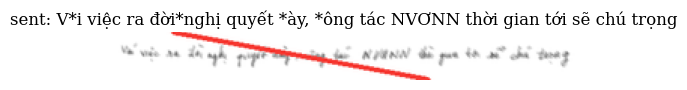

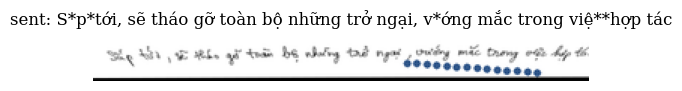

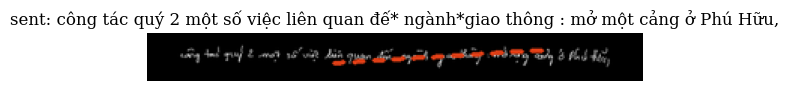

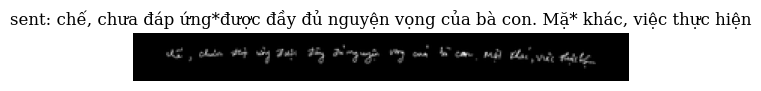

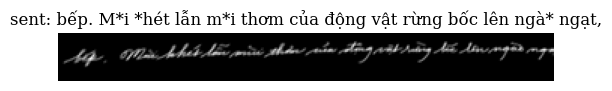

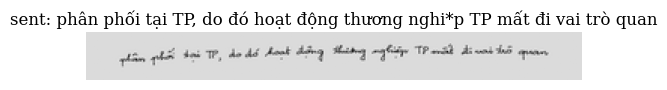

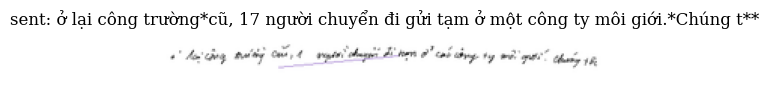

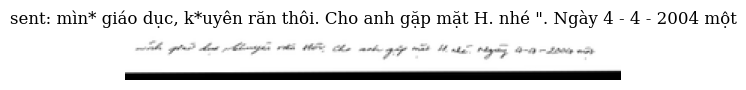

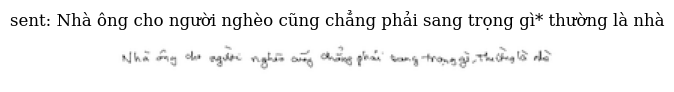

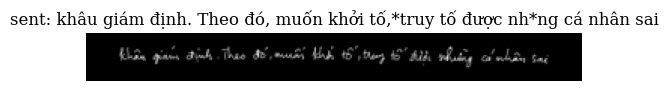

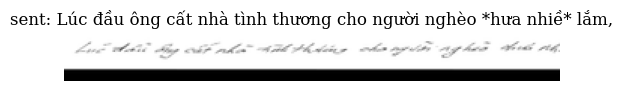

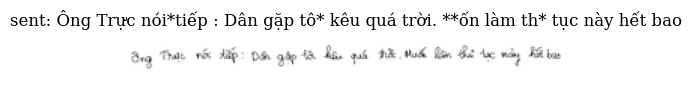

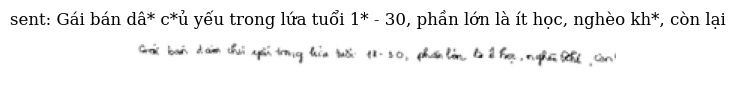

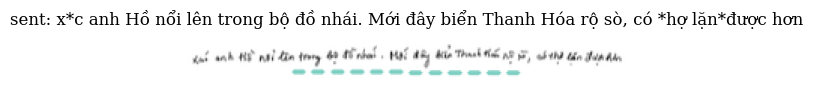

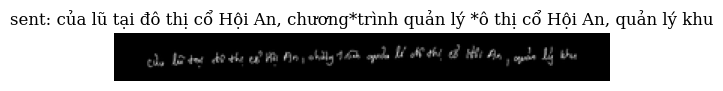

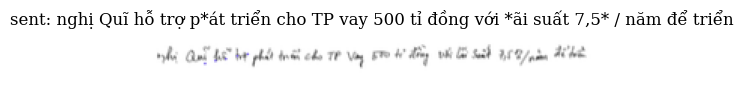

In [16]:
trainer.visualize_dataset()

Train now

In [17]:
trainer.train()

iter: 000200 - train loss: 1.625 - lr: 1.91e-05 - load time: 0.82 - gpu time: 78.82
iter: 000400 - train loss: 1.372 - lr: 3.95e-05 - load time: 0.64 - gpu time: 81.29
iter: 000600 - train loss: 1.246 - lr: 7.14e-05 - load time: 0.52 - gpu time: 80.41
iter: 000800 - train loss: 1.174 - lr: 1.12e-04 - load time: 1.01 - gpu time: 80.66
iter: 001000 - train loss: 1.120 - lr: 1.56e-04 - load time: 0.60 - gpu time: 80.67
iter: 001200 - train loss: 1.088 - lr: 2.01e-04 - load time: 0.57 - gpu time: 81.28
iter: 001400 - train loss: 1.042 - lr: 2.41e-04 - load time: 1.01 - gpu time: 80.66
iter: 001600 - train loss: 1.019 - lr: 2.73e-04 - load time: 0.75 - gpu time: 80.80
iter: 001800 - train loss: 0.999 - lr: 2.93e-04 - load time: 0.79 - gpu time: 80.82
iter: 002000 - train loss: 0.987 - lr: 3.00e-04 - load time: 0.53 - gpu time: 80.92
iter: 002200 - train loss: 0.967 - lr: 3.00e-04 - load time: 0.90 - gpu time: 80.51
iter: 002400 - train loss: 0.941 - lr: 3.00e-04 - load time: 0.56 - gpu time

Visualize prediction from our trained model


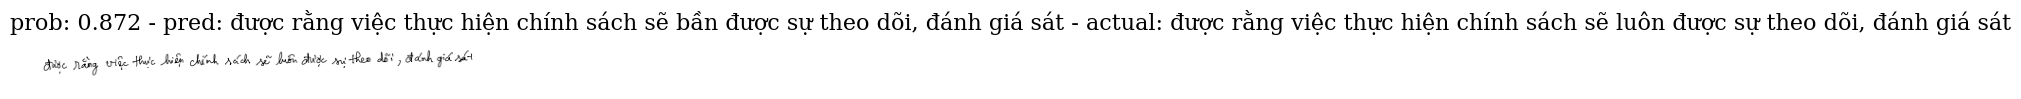

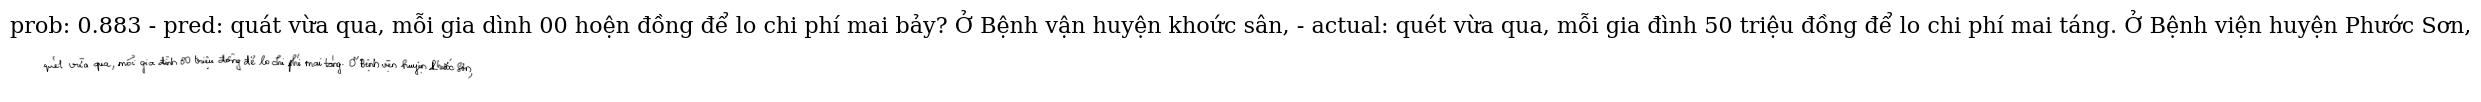

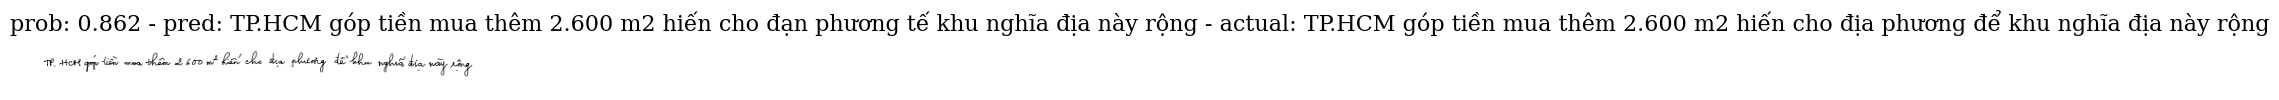

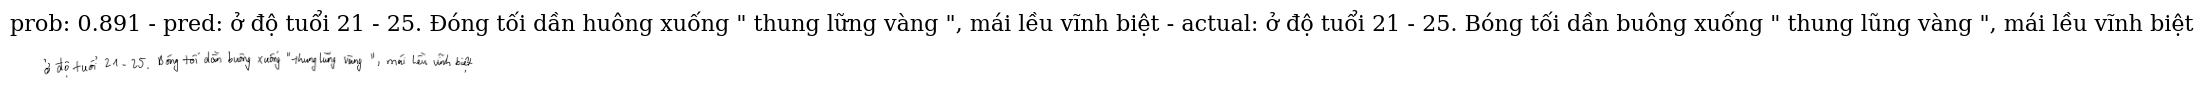

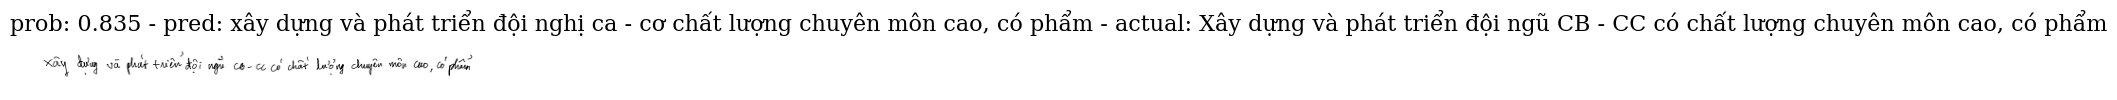

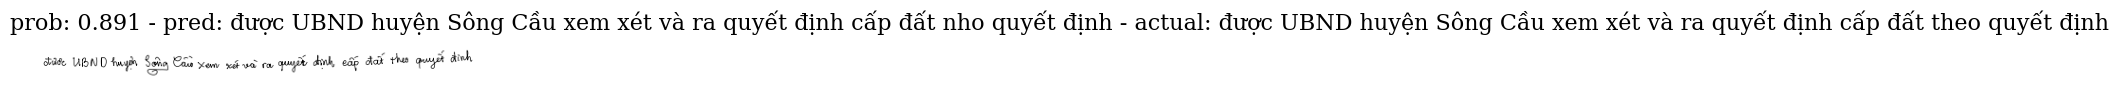

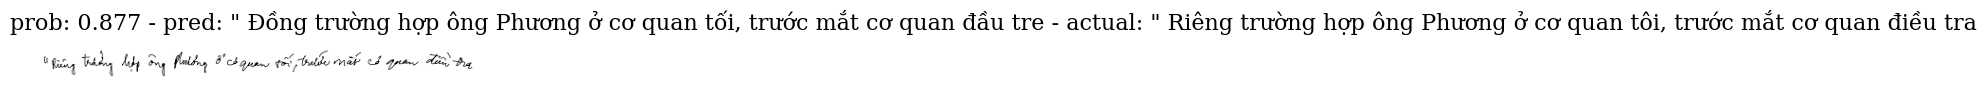

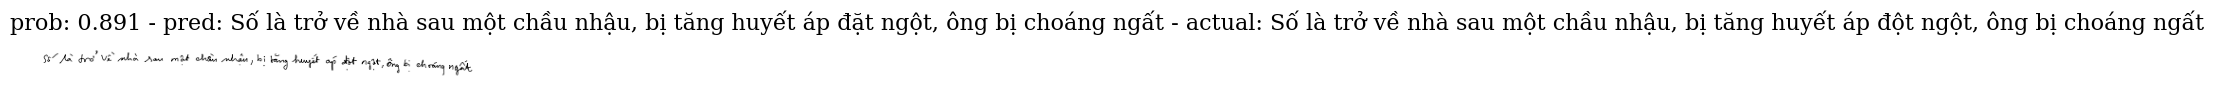

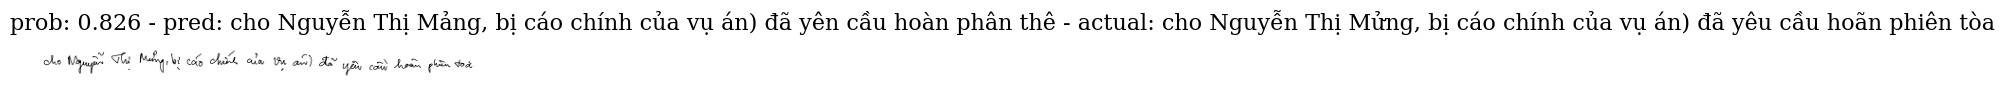

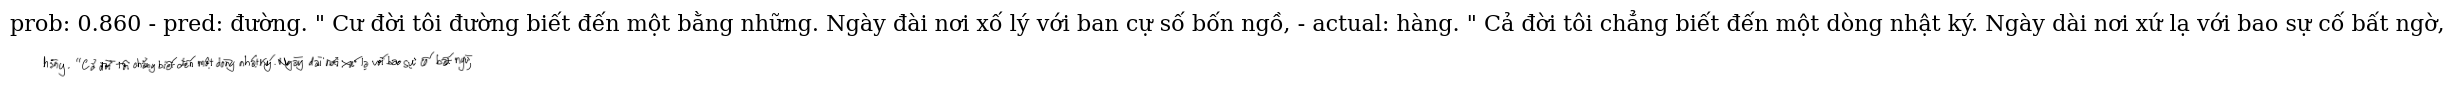

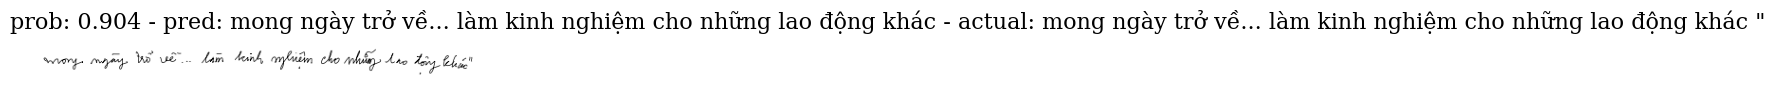

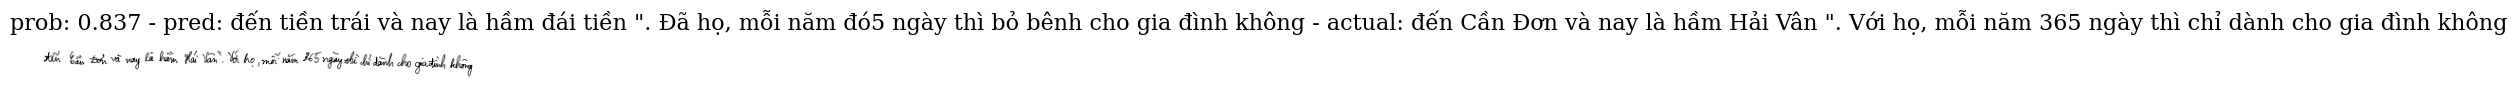

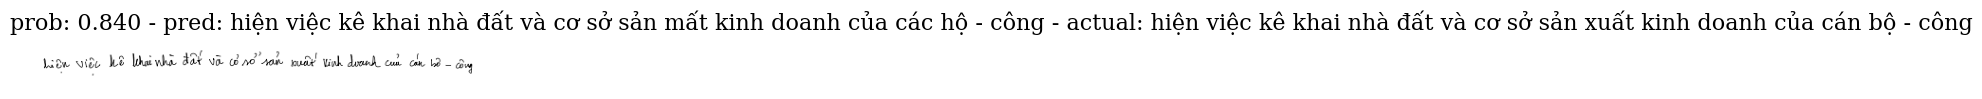

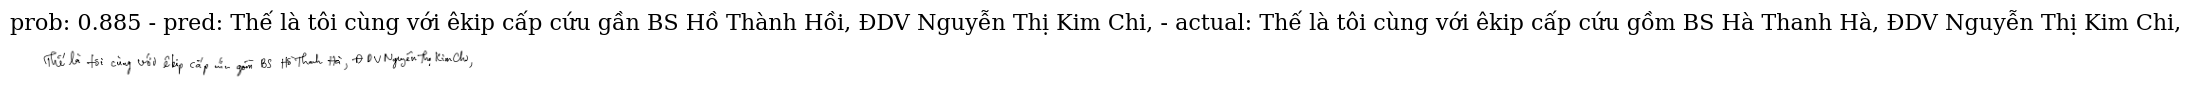

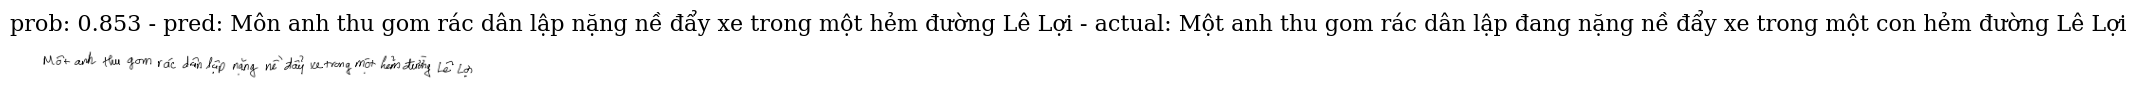

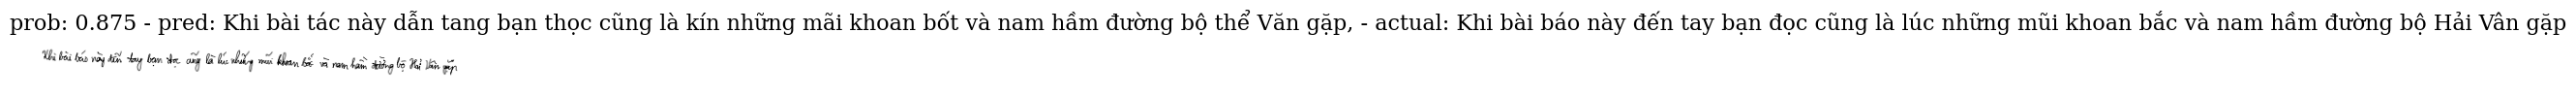

In [18]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [19]:
trainer.precision()

(0.0546875, np.float32(0.58224094))

In [20]:
trainer.config.save('config.yml')

In [25]:
!pip install jiwer

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.1/3.1 MB 41.4 MB/s eta 0:00:00


In [28]:
import os

weights_path = "./weights/transformerocr.pth"
if os.path.exists(weights_path):
    print("[‚úì] Tr·ªçng s·ªë m√¥ h√¨nh t·ªìn t·∫°i.")
else:
    print("[X] Tr·ªçng s·ªë m√¥ h√¨nh kh√¥ng t√¨m th·∫•y. H√£y ki·ªÉm tra ƒë∆∞·ªùng d·∫´n!")


[‚úì] Tr·ªçng s·ªë m√¥ h√¨nh t·ªìn t·∫°i.


In [29]:
import torch
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

# Load config t·ª´ file YAML
config = Cfg.load_config_from_file('/content/config.yml')

# Ch·ªânh s·ª≠a ƒë∆∞·ªùng d·∫´n n·∫øu c·∫ßn
config['weights'] = './weights/transformerocr.pth'
config['device'] = 'cuda' if torch.cuda.is_available() else 'cpu'

# Kh·ªüi t·∫°o m√¥ h√¨nh OCR
detector = Predictor(config)

print("[‚úì] M√¥ h√¨nh OCR ƒë√£ ƒë∆∞·ª£c load th√†nh c√¥ng!")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


[‚úì] M√¥ h√¨nh OCR ƒë√£ ƒë∆∞·ª£c load th√†nh c√¥ng!


In [30]:
test_file = "./data_line/test_line_annotation.txt"
data_root = "./data_line/InkData_line_processed/"

test_data = []

# ƒê·ªçc file annotation
with open(test_file, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split("\t")  # Gi·∫£ s·ª≠ file txt d√πng tab ƒë·ªÉ ph√¢n t√°ch
        if len(parts) == 2:
            img_name, label = parts
            img_path = os.path.join(data_root, img_name)  # ƒê∆∞·ªùng d·∫´n ƒë·∫ßy ƒë·ªß
            test_data.append((img_path, label))

# Ki·ªÉm tra s·ªë l∆∞·ª£ng ·∫£nh test
print(f"üîç T·ªïng s·ªë m·∫´u test: {len(test_data)}")


üîç T·ªïng s·ªë m·∫´u test: 1451


In [33]:
import os

test_file = "./data_line/test_line_annotation.txt"
data_root = "./data_line/InkData_line_processed/"  # ƒê√∫ng th∆∞ m·ª•c ch·ª©a ·∫£nh!

test_data = []
with open(test_file, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split("\t")
        if len(parts) == 2:
            img_name, label = parts

            # Ch·ªâ gh√©p data_root + img_name m√† kh√¥ng l·∫∑p th∆∞ m·ª•c
            img_path = os.path.join(data_root, os.path.basename(img_name))
            test_data.append((img_path, label))

# Ki·ªÉm tra xem ·∫£nh c√≥ t·ªìn t·∫°i kh√¥ng
for img_path, label in test_data[:5]:  # Ch·ªâ ki·ªÉm tra 5 ·∫£nh ƒë·∫ßu
    if not os.path.exists(img_path):
        print(f"[X] ·∫¢nh kh√¥ng t·ªìn t·∫°i: {img_path}")
    else:
        print(f"[‚úì] ·∫¢nh OK: {img_path}")


[‚úì] ·∫¢nh OK: ./data_line/InkData_line_processed/20160722_0202_26749_1_tg_1_3.png
[‚úì] ·∫¢nh OK: ./data_line/InkData_line_processed/20151208_0064_26558_1_tg_0_0.png
[‚úì] ·∫¢nh OK: ./data_line/InkData_line_processed/20140603_0006_KQBDVN_tg_0_6.png
[‚úì] ·∫¢nh OK: ./data_line/InkData_line_processed/20160517_0149_9539_2_tg_4_0.png
[‚úì] ·∫¢nh OK: ./data_line/InkData_line_processed/20160604_0195_26558_2_tg_0_0.png


In [35]:
from PIL import Image

# Ch·∫°y m√¥ h√¨nh tr√™n t·∫≠p test
preds = []
targets = []

for img_path, label in test_data:
    try:
        # M·ªü ·∫£nh b·∫±ng PIL tr∆∞·ªõc khi ƒë∆∞a v√†o model
        img = Image.open(img_path).convert("RGB")

        pred = detector.predict(img)  # D·ª± ƒëo√°n t·ª´ ·∫£nh ƒë√£ m·ªü
        preds.append(pred)
        targets.append(label)

        print(f"[‚úì] {img_path}: {pred} (GT: {label})")
    except Exception as e:
        print(f"[X] L·ªói ƒë·ªçc ·∫£nh {img_path}: {e}")

[‚úì] ./data_line/InkData_line_processed/20160722_0202_26749_1_tg_1_3.png: ƒë·ªÉ ƒë·ªÅu tra b·ªó trung v√¨ v·ª• √°n c√≥ d·∫•u hi·ªáu ƒë·ªÉ l·∫°t ng∆∞·ªùi, l·ªçt t·ªôi. C∆° s·ªü ƒë·ªÉ (GT: ƒë·ªÉ ƒëi·ªÅu tra b·ªï sung v√¨ v·ª• √°n c√≥ d·∫•u hi·ªáu ƒë·ªÉ l·ªçt ng∆∞·ªùi, l·ªçt t·ªôi. C∆° s·ªü ƒë·ªÉ)
[‚úì] ./data_line/InkData_line_processed/20151208_0064_26558_1_tg_0_0.png: H·ªôi ngh·ªã Th√†nh ·ªßy TP.HCM l·∫ßn 16 BCH ƒê·∫£ng b·ªô TP kh√≥a VII. Kinh ƒë√≥ s·ª•t gi·∫£m, nguy√™n nh√¢n t·ª´ ƒë√¢u? (GT: H·ªôi ngh·ªã Th√†nh ·ªßy TP.HCM l·∫ßn 16 BCH ƒê·∫£ng b·ªô TP kh√≥a VII : Kinh t·∫ø s·ª•t gi·∫£m, nguy√™n nh√¢n t·ª´ ƒë√¢u?)
[‚úì] ./data_line/InkData_line_processed/20140603_0006_KQBDVN_tg_0_6.png: di·ªán ti·∫øn tr√™n 1 tri·ªáu km2 (g·∫•p 3 di·ªán t√≠ch ƒë·∫•t li·ªÅn : 1 tri·ªáu km2 / 330.000 (GT: di·ªán t√≠ch tr√™n 1 tri·ªáu km2 (g·∫•p 3 di·ªán t√≠ch ƒë·∫•t li·ªÅn : 1 tri·ªáu km2 / 330.000)
[‚úì] ./data_line/InkData_line_processed/20160517_0149_9539_2_tg_4_0.png: C√≥ ng∆∞·ªùi cho ti·ªÅn mua s·∫Ø

In [37]:
from jiwer import cer, wer

# T√≠nh to√°n CER & WER
cer_score = cer(targets, preds)
wer_score = wer(targets, preds)

# In k·∫øt qu·∫£
print("\n Model Review")
print(f" Character precision (1 - CER): {100 * (1 - cer_score):.2f}%")
print(f" Word Error Rate (1 - WER): {100 * (1 - wer_score):.2f}%")
print(f" CER (Character Error Rate): {cer_score:.4f}")
print(f" WER (Word Error Rate): {wer_score:.4f}")


 Model Review
 Character precision (1 - CER): 90.10%
 Word Error Rate (1 - WER): 76.07%
 CER (Character Error Rate): 0.0990
 WER (Word Error Rate): 0.2393
